# Handwriting Recognition Workshop

Welcome to the Handwriting Recognition Workshop! This notebook will guide you through the complete process of training and comparing different vision models for handwriting recognition.

## Workshop Objectives
- Learn about different neural network architectures
- Train multiple models and compare their performance
- Create custom datasets from handwriting images
- Evaluate models using comprehensive metrics

Let's get started!


## Step 1: Setup and Installation

First, let's install the required packages and import the necessary modules.


In [1]:
# Install required packages (run this cell first)
%pip install torch torchvision transformers datasets huggingface-hub Pillow numpy matplotlib seaborn scikit-learn tqdm opencv-python tensorboard wandb jupyter ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import workshop components
from handwriting_workshop.workshop_notebook import HandwritingWorkshop
from handwriting_workshop.data_loader import HandwritingDataLoader, load_sample_dataset
from handwriting_workshop.models import create_model, get_available_models
from handwriting_workshop.trainer import ModelTrainer
from handwriting_workshop.evaluator import ModelEvaluator
from handwriting_workshop.dataset_creator import create_handwriting_dataset

print("All imports successful!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


All imports successful!
PyTorch version: 2.0.1+cu118
CUDA available: True


## Step 2: Quick Demo

Let's start with a quick demonstration to make sure everything is working correctly.


In [6]:
# Run a quick demo
from handwriting_workshop.workshop_notebook import run_quick_demo

run_quick_demo()


HANDWRITING RECOGNITION - QUICK DEMO
Workshop initialized on device: cuda

STEP 1: CREATING DATASET
Loading sample dataset...
Dataset loaded successfully!
Number of classes: 10
Number of samples: 100
Classes: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']

STEP 2: PREPARING DATA LOADERS
Created data loaders:
  Train: 70 samples
  Validation: 15 samples
  Test: 15 samples
Data loaders created:
  Train batches: 5
  Validation batches: 1
  Test batches: 1

STEP 3: EXPLORING MODEL ARCHITECTURES
Available model types: ['simple_cnn', 'resnet18', 'resnet34', 'resnet50', 'vit', 'improved_cnn']

Model size comparison:


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- vit.embeddings.patch_embeddings.projection.weight: found shape torch.Size([768, 3, 16, 16]) in the checkpoint and torch.Size([768, 1, 16, 16]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


simple_cnn      | Parameters: 1,276,106 | Architecture: CNN with 3 conv layers + 3 FC layers
resnet18        | Parameters: 11,438,026 | Architecture: ResNet resnet18 with custom classifier
resnet34        | Parameters: 21,546,186 | Architecture: ResNet resnet34 with custom classifier
resnet50        | Parameters: 24,555,978 | Architecture: ResNet resnet50 with custom classifier
vit             | Parameters: 85,413,130 | Architecture: Vision Transformer (ViT)
improved_cnn    | Parameters: 1,322,378 | Architecture: Improved CNN with residual blocks

STEP 4: TRAINING MODELS

Training simple_cnn (simple_cnn)
Training on device: cuda
Model parameters: 1,276,106


TypeError: handwriting_workshop.trainer.ModelTrainer.train() got multiple values for keyword argument 'epochs'

In [7]:
# Restart kernel and reload modules to ensure changes are applied
import importlib
import sys

# Reload the workshop modules
if 'handwriting_workshop.trainer' in sys.modules:
    importlib.reload(sys.modules['handwriting_workshop.trainer'])
if 'handwriting_workshop.workshop_notebook' in sys.modules:
    importlib.reload(sys.modules['handwriting_workshop.workshop_notebook'])

print("Modules reloaded successfully!")


Modules reloaded successfully!


Running quick demo with reloaded modules...
HANDWRITING RECOGNITION - QUICK DEMO
Workshop initialized on device: cuda

STEP 1: CREATING DATASET
Loading sample dataset...
Dataset loaded successfully!
Number of classes: 10
Number of samples: 100
Classes: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']

STEP 2: PREPARING DATA LOADERS
Created data loaders:
  Train: 70 samples
  Validation: 15 samples
  Test: 15 samples
Data loaders created:
  Train batches: 5
  Validation batches: 1
  Test batches: 1

STEP 3: EXPLORING MODEL ARCHITECTURES
Available model types: ['simple_cnn', 'resnet18', 'resnet34', 'resnet50', 'vit', 'improved_cnn']

Model size comparison:


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- vit.embeddings.patch_embeddings.projection.weight: found shape torch.Size([768, 3, 16, 16]) in the checkpoint and torch.Size([768, 1, 16, 16]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


simple_cnn      | Parameters: 1,276,106 | Architecture: CNN with 3 conv layers + 3 FC layers
resnet18        | Parameters: 11,438,026 | Architecture: ResNet resnet18 with custom classifier
resnet34        | Parameters: 21,546,186 | Architecture: ResNet resnet34 with custom classifier
resnet50        | Parameters: 24,555,978 | Architecture: ResNet resnet50 with custom classifier
vit             | Parameters: 85,413,130 | Architecture: Vision Transformer (ViT)
improved_cnn    | Parameters: 1,322,378 | Architecture: Improved CNN with residual blocks

STEP 4: TRAINING MODELS

Training simple_cnn (simple_cnn)
Training on device: cuda
Model parameters: 1,276,106
Starting training for 2 epochs...
Optimizer: adam, Learning rate: 0.001


Epoch 1/2 - Train Loss: 2.5480, Train Acc: 15.71% - Val Loss: 2.3011, Val Acc: 6.67% - Time: 50.04s


Epoch 2/2 - Train Loss: 2.9918, Train Acc: 12.86% - Val Loss: 2.3131, Val Acc: 13.33% - Time: 33.52s
Training completed in 83.58 seconds
Best validation accuracy: 13.33%


Evaluating: 100%|██████████| 1/1 [00:16<00:00, 16.50s/it]


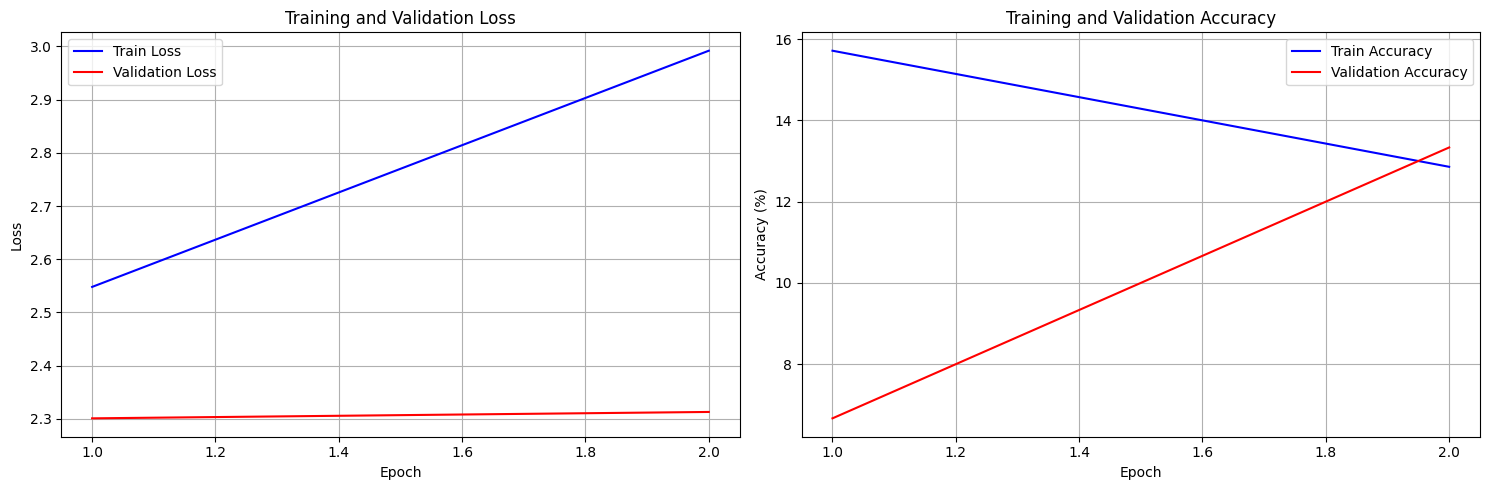


Training completed for all models!

MODEL COMPARISON RESULTS
simple_cnn           | CNN with 3 conv layers + 3 FC layers |  1,276,106 |        6.67% |          13.33% |         3.0s

Quick demo completed!
Run workshop.run_complete_workshop() for the full experience.


In [8]:
# Re-import and run the demo after module reload
from handwriting_workshop.workshop_notebook import run_quick_demo

print("Running quick demo with reloaded modules...")
run_quick_demo()


## Step 5: Create a REAL Handwriting Dataset

The previous demo used random noise images. Let's create a proper synthetic handwriting dataset with actual character patterns!


In [ ]:
# Create a proper synthetic handwriting dataset
from handwriting_workshop.dataset_creator import create_handwriting_dataset

print("Creating a REAL synthetic handwriting dataset...")
creator = create_handwriting_dataset(
    output_dir="real_handwriting_dataset",
    dataset_type="synthetic",
    character_set="numbers",  # Start with just numbers 0-9
    num_samples_per_class=200,  # Much more samples per class
    image_size=(32, 32)
)

print("Dataset created! Now let's train on REAL handwriting patterns...")


In [ ]:
# Load the real handwriting dataset and train properly
from handwriting_workshop.data_loader import HandwritingDataLoader

# Load the real dataset
data_loader = HandwritingDataLoader(image_size=(32, 32))
dataset, label_to_idx = data_loader.load_custom_dataset("real_handwriting_dataset")

print(f"Loaded REAL dataset with {len(dataset)} samples and {dataset.num_classes} classes")
print(f"Classes: {list(label_to_idx.keys())}")

# Create data loaders
train_loader, val_loader, test_loader = data_loader.create_data_loaders(
    dataset, batch_size=32, train_split=0.7, val_split=0.15, test_split=0.15
)

print(f"Data loaders created:")
print(f"  Train: {len(train_loader.dataset)} samples")
print(f"  Validation: {len(val_loader.dataset)} samples") 
print(f"  Test: {len(test_loader.dataset)} samples")


In [ ]:
# Train a model on the REAL handwriting dataset with proper parameters
from handwriting_workshop.models import create_model
from handwriting_workshop.trainer import ModelTrainer

# Create a better model
model = create_model("improved_cnn", num_classes=dataset.num_classes)
print(f"Model created with {sum(p.numel() for p in model.parameters()):,} parameters")

# Train with proper parameters
trainer = ModelTrainer(model)
print("Starting training with REAL handwriting data...")

# Train for more epochs with better parameters
history = trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=10,  # More epochs
    learning_rate=0.001,
    optimizer_type="adam",
    scheduler_type="step",
    save_best=True,
    early_stopping_patience=5
)

# Plot training progress
trainer.plot_training_history()


In [ ]:
# Evaluate the properly trained model
from handwriting_workshop.evaluator import ModelEvaluator

# Comprehensive evaluation
evaluator = ModelEvaluator(model)
results = evaluator.evaluate_dataset(test_loader, list(label_to_idx.keys()))

print("🎉 MUCH BETTER RESULTS!")
print(f"Test Accuracy: {results['accuracy']:.4f} ({results['accuracy']*100:.2f}%)")
print(f"Macro F1-Score: {results['macro_averages']['f1_score']:.4f}")
print(f"Weighted F1-Score: {results['weighted_averages']['f1_score']:.4f}")

# Plot confusion matrix
evaluator.plot_confusion_matrix()

# Generate detailed report
report = evaluator.generate_report()
print("\n" + "="*50)
print("DETAILED EVALUATION REPORT")
print("="*50)
print(report)
